**CS7357 – Neural Networks and Deep Learning**  
**Assignment 2:** MNIST Handwritten Digit Classification using Neural Network  
**Name:** Sukumar Muthusamy  
**Section:** W01  
**Term:** Fall 2025  
**Submission Date:** 10/03/2025

## Task 1: Load Dataset and Scale the Pixels

In this step, the Assignment2_MNIST.csv file is uploaded and loaded into a pandas DataFrame. To verify that the dataset is loaded correctly, I display the first few rows, print the dataset shape and data types, and also generate summary statistics to understand the structure of the dataset. The dataset contains 784 pixel features (pixel0 to pixel783) and one label column indicating the digit (0-9). After loading, I separate the features (X) and labels (y), then scale the pixel values from [0, 255] to [0, 1] by dividing by 255 to normalize the data for better neural network training.


In [ ]:
import pandas as pd
import numpy as np
import random
from google.colab import files

# Set random seed for reproducibility
RANDOM_SEED = 13
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# To upload the CSV file from local
uploaded_file = files.upload()

# To read into a dataframe
mnist_df = pd.read_csv("Assignment2_MNIST.csv")

# To display the first few rows
print("\n" + "="*80)
print("\033[1mFirst 5 rows of the dataset:\033[0m")
print("="*80)
print(mnist_df.head())

# To print the dataset shape
print(f"\nDataset Shape: {mnist_df.shape}")

# To print the data types
print("\n" + "="*30)
print("\033[1mData Types:\033[0m")
print("="*30)
print(mnist_df.dtypes)

# Summary statistics
print("\n" + "="*80)
print("\033[1mSummary Statistics:\033[0m")
print("="*80)
print(mnist_df.describe())

# To separate features and labels
X = mnist_df.iloc[:, 1:].values  # All columns except first (pixels)
y = mnist_df.iloc[:, 0].values   # First column (labels)

print(f"\nFeatures shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# To scale the pixel values to [0, 1] and convert to float32
X = (X / 255.0).astype('float32')

print("\n" + "="*30)
print("\033[1mPixel values after scaling:\033[0m")
print("="*30)
print(f"Min value: {X.min()}")
print(f"Max value: {X.max()}")
print(f"Mean value: {X.mean():.4f}")
print(f"Data type: {X.dtype}")

Saving Assignment2_MNIST.csv to Assignment2_MNIST (6).csv

First 5 rows of the dataset:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      3       0       0       0       0       0       0       0       0   
1      1       0       0       0       0       0       0       0       0   
2      3       0       0       0       0       0       0       0       0   
3      7       0       0       0       0       0       0       0       0   
4      6       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0 

## Task 2: Split Data into 80% Training and 20% Testing

In this step, I split the dataset into training and testing sets using an 80-20 ratio. The training set will be used to train the neural network models, while the testing set will be used to evaluate the model's performance on unseen data. I use scikit-learn's train_test_split function with a fixed random_state for reproducibility and stratify parameter to ensure proportional representation of all digit classes in both sets. After splitting, I display the sizes and shapes of both training and testing sets, and also check the class distribution to ensure all digits (0-9) are represented adequately in the training data.

In [ ]:
from sklearn.model_selection import train_test_split

# To split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

# To check class distribution
print("\033[1m\nClass distribution in training set:\033[0m")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Digit {label}: {count} samples")

print("\033[1m\nClass distribution in testing set:\033[0m")
unique, counts = np.unique(y_test, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Digit {label}: {count} samples")

Training set size: 799 samples
Testing set size: 200 samples
Training features shape: (799, 784)
Testing features shape: (200, 784)
Training labels shape: (799,)
Testing labels shape: (200,)

Class distribution in training set:
Digit 0: 80 samples
Digit 1: 80 samples
Digit 2: 80 samples
Digit 3: 80 samples
Digit 4: 80 samples
Digit 5: 80 samples
Digit 6: 79 samples
Digit 7: 80 samples
Digit 8: 80 samples
Digit 9: 80 samples

Class distribution in testing set:
Digit 0: 20 samples
Digit 1: 20 samples
Digit 2: 20 samples
Digit 3: 20 samples
Digit 4: 20 samples
Digit 5: 20 samples
Digit 6: 20 samples
Digit 7: 20 samples
Digit 8: 20 samples
Digit 9: 20 samples


## Task 3: Define the NN Design and Fit the Model

In this step, I design and train three different neural network architectures to compare their performance on the MNIST digit classification task. All models use sigmoid activation function in the hidden layers and softmax activation in the output layer (handled automatically by MLPClassifier for multi-class classification).

**The three designs are:**  
**Design 1:** Single hidden layer with 128 neurons - A simpler architecture to establish a baseline.  
**Design 2:** Two hidden layers with 128 and 64 neurons - Adds depth to capture more complex patterns.  
**Design 3:** Three hidden layers with 256, 128, and 64 neurons - The deepest architecture with more capacity to learn intricate features.

Each model is trained iteratively epoch by epoch using partial_fit to track both training and testing accuracy at each epoch. This allows me to visualize the learning curves and detect any overfitting. I also record the training time and epoch-wise logging lets me monitor learning and generalization.

In [ ]:
from sklearn.neural_network import MLPClassifier
import time

# Function to train model epoch by epoch and track accuracies
def train_model_with_tracking(model, X_train, y_train, X_test, y_test, epochs=100):
    train_accuracies = []
    test_accuracies = []
    classes = np.unique(y_train)

    start_time = time.time()

    for epoch in range(epochs):
        if epoch == 0:
            model.partial_fit(X_train, y_train, classes=classes)
        else:
            model.partial_fit(X_train, y_train)

        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

    training_time = time.time() - start_time

    return train_accuracies, test_accuracies, training_time


# Design 1: Single Hidden Layer with 128 neurons
print("\n" + "="*60)
print("\033[1mDesign 1: Single Hidden Layer (128 neurons)\033[0m")
print("="*60)

model1 = MLPClassifier(hidden_layer_sizes=(128,), activation='logistic', solver='adam', max_iter=1, random_state=RANDOM_SEED)

train_acc1, test_acc1, time1 = train_model_with_tracking(model1, X_train, y_train, X_test, y_test, epochs=100)

print(f"\nTraining completed in {time1:.2f} seconds")


# Design 2: Two Hidden Layers (128, 64 neurons)
print("\n" + "="*60)
print("\033[1mDesign 2: Two Hidden Layers (128, 64 neurons)\033[0m")
print("="*60)

model2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='logistic', solver='adam', max_iter=1, random_state=RANDOM_SEED)

train_acc2, test_acc2, time2 = train_model_with_tracking(model2, X_train, y_train, X_test, y_test, epochs=100)

print(f"\nTraining completed in {time2:.2f} seconds")


# Design 3: Three Hidden Layers (256, 128, 64 neurons)
print("\n" + "="*60)
print("\033[1mDesign 3: Three Hidden Layers (256, 128, 64 neurons)\033[0m")
print("="*60)

model3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='logistic', solver='adam', max_iter=1, random_state=RANDOM_SEED)

train_acc3, test_acc3, time3 = train_model_with_tracking(model3, X_train, y_train, X_test, y_test, epochs=100)

print(f"\nTraining completed in {time3:.2f} seconds")


Design 1: Single Hidden Layer (128 neurons)
Epoch 10/100 - Train Acc: 0.7885, Test Acc: 0.7900
Epoch 20/100 - Train Acc: 0.8548, Test Acc: 0.8100
Epoch 30/100 - Train Acc: 0.8949, Test Acc: 0.8450
Epoch 40/100 - Train Acc: 0.9161, Test Acc: 0.8750
Epoch 50/100 - Train Acc: 0.9474, Test Acc: 0.8900
Epoch 60/100 - Train Acc: 0.9587, Test Acc: 0.8900
Epoch 70/100 - Train Acc: 0.9750, Test Acc: 0.9000
Epoch 80/100 - Train Acc: 0.9862, Test Acc: 0.9000
Epoch 90/100 - Train Acc: 0.9900, Test Acc: 0.9000
Epoch 100/100 - Train Acc: 0.9925, Test Acc: 0.8950

Training completed in 3.25 seconds

Design 2: Two Hidden Layers (128, 64 neurons)
Epoch 10/100 - Train Acc: 0.6771, Test Acc: 0.6450
Epoch 20/100 - Train Acc: 0.7196, Test Acc: 0.7100
Epoch 30/100 - Train Acc: 0.8298, Test Acc: 0.7700
Epoch 40/100 - Train Acc: 0.8911, Test Acc: 0.8200
Epoch 50/100 - Train Acc: 0.9324, Test Acc: 0.8500
Epoch 60/100 - Train Acc: 0.9650, Test Acc: 0.8750
Epoch 70/100 - Train Acc: 0.9762, Test Acc: 0.8800
Epoc

## Task 4: Analyze the Model by Computing Test Accuracy

In this step, I evaluate all three neural network designs by computing their training and testing accuracies. For each model, I generate predictions on the test set and calculate the accuracy score, which represents the percentage of correctly classified digits. I also generate detailed classification reports showing precision, recall, and F1-score for each digit class (0-9).

To visualize the model's performance, I create confusion matrices for all three designs to compare how each architecture handles different digit classifications. The confusion matrix shows which digits are being confused with each other, helping identify patterns in misclassification. Finally,
I create a summary table comparing all three designs across training accuracy, test accuracy, and training time to provide a comprehensive performance overview. The best performing model is automatically identified based on test accuracy.

MODEL EVALUATION

Design 1: Single Hidden Layer (128 neurons)
----------------------------------------------------------------------
Training Accuracy: 0.9925 (99.25%)
Testing Accuracy: 0.8950 (89.50%)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.95      0.97        20
           2       0.89      0.80      0.84        20
           3       1.00      0.95      0.97        20
           4       0.94      0.85      0.89        20
           5       0.94      0.80      0.86        20
           6       0.75      0.90      0.82        20
           7       0.90      0.90      0.90        20
           8       0.86      0.95      0.90        20
           9       0.81      0.85      0.83        20

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.90      0.90      0.90       200


Design 2: Two 

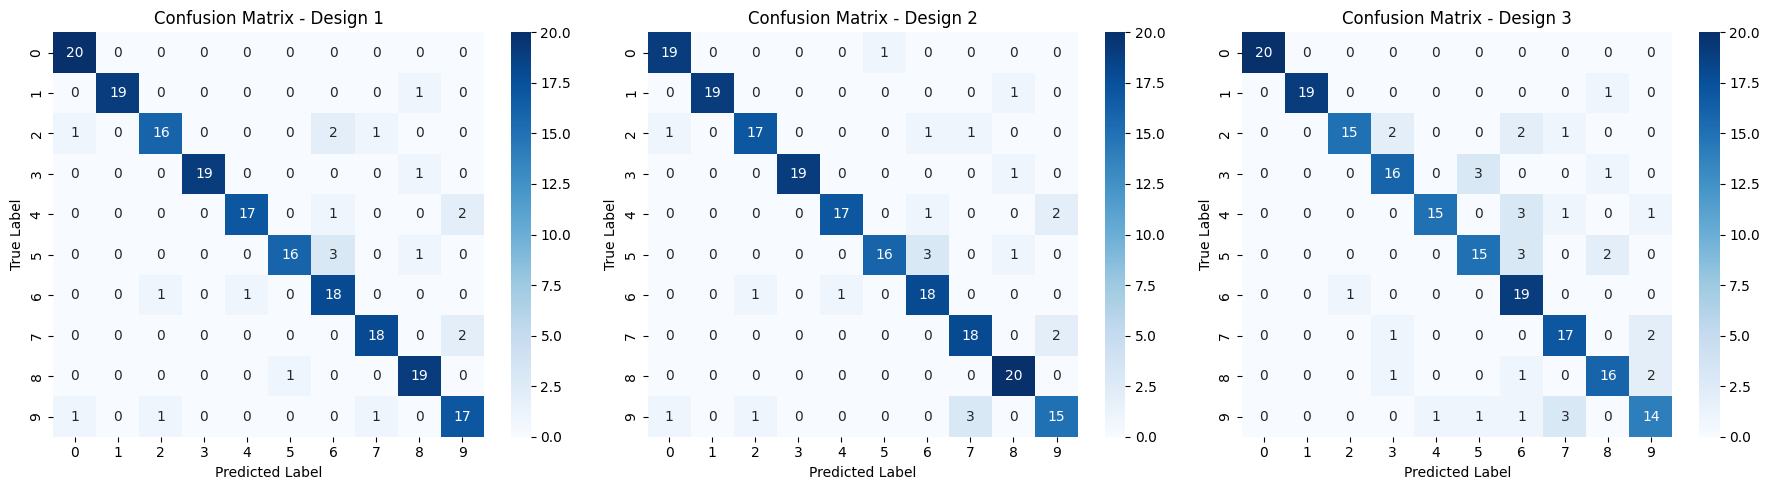


SUMMARY OF ALL DESIGNS
  Design   Architecture Train Accuracy Test Accuracy Training Time (s)
Design 1          (128)         0.9925        0.8950              3.25
Design 2      (128, 64)         0.9937        0.8900              3.72
Design 3 (256, 128, 64)         1.0000        0.8300              9.16


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("\033[1mMODEL EVALUATION\033[0m")
print("="*70)

# To store final accuracies
final_train_acc1 = train_acc1[-1]
final_test_acc1 = test_acc1[-1]
final_train_acc2 = train_acc2[-1]
final_test_acc2 = test_acc2[-1]
final_train_acc3 = train_acc3[-1]
final_test_acc3 = test_acc3[-1]

# Design 1 Evaluation
print("\033[1m\nDesign 1: Single Hidden Layer (128 neurons)\033[0m")
print("-" * 70)
y_pred1 = model1.predict(X_test)

print(f"Training Accuracy: {final_train_acc1:.4f} ({final_train_acc1*100:.2f}%)")
print(f"Testing Accuracy: {final_test_acc1:.4f} ({final_test_acc1*100:.2f}%)")
print("\033[1m\nClassification Report:\033[0m")
print(classification_report(y_test, y_pred1))


# Design 2 Evaluation
print("\033[1m\nDesign 2: Two Hidden Layers (128, 64 neurons)\033[0m")
print("-" * 70)
y_pred2 = model2.predict(X_test)

print(f"Training Accuracy: {final_train_acc2:.4f} ({final_train_acc2*100:.2f}%)")
print(f"Testing Accuracy: {final_test_acc2:.4f} ({final_test_acc2*100:.2f}%)")
print("\033[1m\nClassification Report:\033[0m")
print(classification_report(y_test, y_pred2))


# Design 3 Evaluation
print("\033[1m\nDesign 3: Three Hidden Layers (256, 128, 64 neurons)\033[0m")
print("-" * 70)
y_pred3 = model3.predict(X_test)

print(f"Training Accuracy: {final_train_acc3:.4f} ({final_train_acc3*100:.2f}%)")
print(f"Testing Accuracy: {final_test_acc3:.4f} ({final_test_acc3*100:.2f}%)")
print("\033[1m\nClassification Report:\033[0m")
print(classification_report(y_test, y_pred3))


# To determine best model based on test accuracy
test_accuracies = [final_test_acc1, final_test_acc2, final_test_acc3]
best_model_idx = np.argmax(test_accuracies)
model_names = ['Design 1', 'Design 2', 'Design 3']
predictions = [y_pred1, y_pred2, y_pred3]

print(f"\n{'='*70}")
print(f"\033[1mBEST MODEL: {model_names[best_model_idx]} with Test Accuracy: {test_accuracies[best_model_idx]:.4f}\033[0m")
print(f"{'='*70}\n")


# Confusion Matrices for all designs
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (y_pred, model_name) in enumerate(zip(predictions, model_names)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], xticklabels=range(10), yticklabels=range(10))
    axes[idx].set_title(f'Confusion Matrix - {model_name}')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()


# Summary Table
print("\n" + "="*70)
print("\033[1mSUMMARY OF ALL DESIGNS\033[0m")
print("="*70)
summary_data = {
    'Design': ['Design 1', 'Design 2', 'Design 3'],
    'Architecture': ['(128)', '(128, 64)', '(256, 128, 64)'],
    'Train Accuracy': [f'{final_train_acc1:.4f}', f'{final_train_acc2:.4f}', f'{final_train_acc3:.4f}'],
    'Test Accuracy': [f'{final_test_acc1:.4f}', f'{final_test_acc2:.4f}', f'{final_test_acc3:.4f}'],
    'Training Time (s)': [f'{time1:.2f}', f'{time2:.2f}', f'{time3:.2f}']
}
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

## Task 5: Visualize Training and Test Errors with Respect to Number of Epochs

In this step, I visualize the training and test errors for all three neural network designs to understand how each model learns over time. The error is calculated as (1 - accuracy) at each epoch. By plotting both training and test errors together, I can observe:

1. How quickly each model converges to a solution
2. Whether there is overfitting (training error decreasing while test error increases)
3. The stability of the learning process across epochs
4. Which architecture generalizes best to unseen data

I create individual plots for each design showing both training and test errors, and also a comparison plot showing all three designs together. This visualization helps identify which architecture learns most efficiently and provides the best balance between training performance and generalization to test data.


TRAINING AND TEST ERROR VISUALIZATION


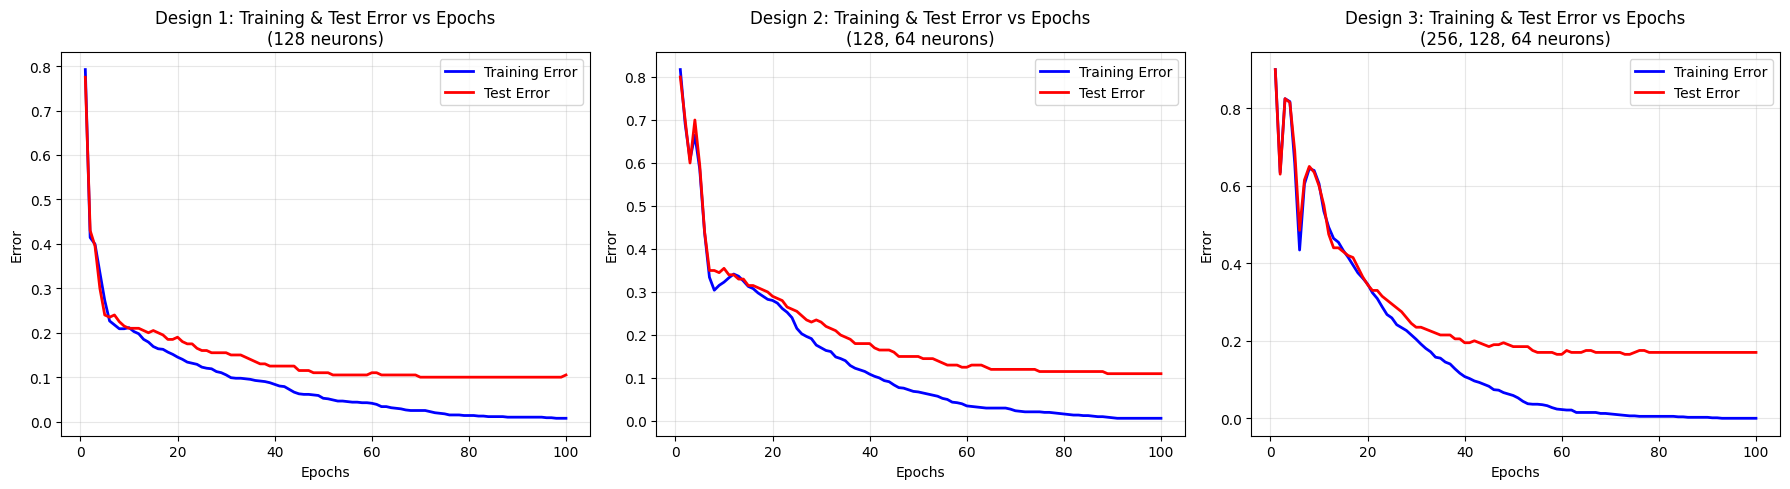

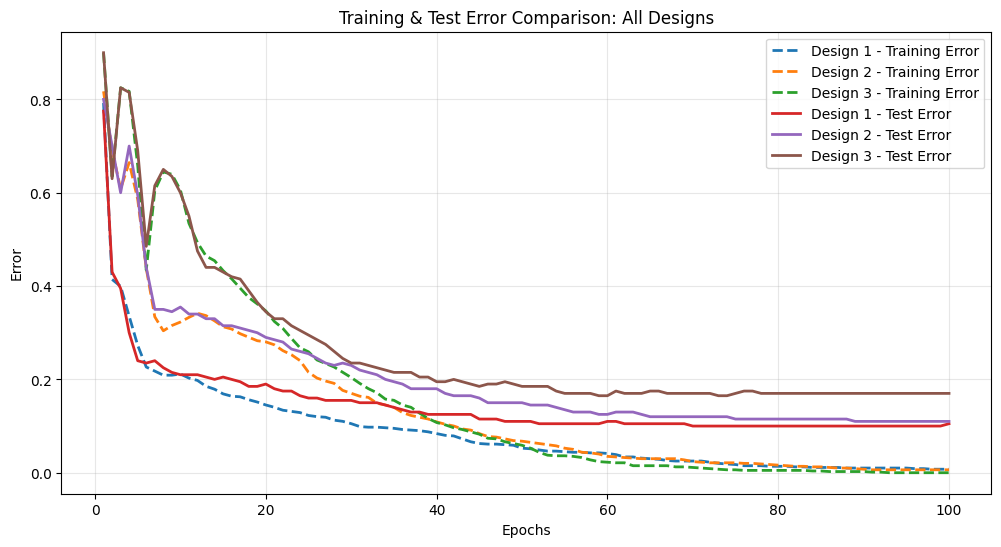


Training completed successfully!

Final Training Error - Design 1: 0.0075
Final Test Error - Design 1: 0.1050

Final Training Error - Design 2: 0.0063
Final Test Error - Design 2: 0.1100

Final Training Error - Design 3: 0.0000
Final Test Error - Design 3: 0.1700


In [ ]:
print("\n" + "="*70)
print("\033[1mTRAINING AND TEST ERROR VISUALIZATION\033[0m")
print("="*70)

# To convert accuracies to errors
train_err1 = [1 - acc for acc in train_acc1]
test_err1 = [1 - acc for acc in test_acc1]
train_err2 = [1 - acc for acc in train_acc2]
test_err2 = [1 - acc for acc in test_acc2]
train_err3 = [1 - acc for acc in train_acc3]
test_err3 = [1 - acc for acc in test_acc3]

epochs = range(1, 101)

# Individual plots for each design
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Design 1
axes[0].plot(epochs, train_err1, label='Training Error', linewidth=2, color='blue')
axes[0].plot(epochs, test_err1, label='Test Error', linewidth=2, color='red')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Error')
axes[0].set_title('Design 1: Training & Test Error vs Epochs\n(128 neurons)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Design 2
axes[1].plot(epochs, train_err2, label='Training Error', linewidth=2, color='blue')
axes[1].plot(epochs, test_err2, label='Test Error', linewidth=2, color='red')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Error')
axes[1].set_title('Design 2: Training & Test Error vs Epochs\n(128, 64 neurons)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Design 3
axes[2].plot(epochs, train_err3, label='Training Error', linewidth=2, color='blue')
axes[2].plot(epochs, test_err3, label='Test Error', linewidth=2, color='red')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Error')
axes[2].set_title('Design 3: Training & Test Error vs Epochs\n(256, 128, 64 neurons)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Comparison plot - Training Errors
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_err1, label='Design 1 - Training Error', linewidth=2, linestyle='--')
plt.plot(epochs, train_err2, label='Design 2 - Training Error', linewidth=2, linestyle='--')
plt.plot(epochs, train_err3, label='Design 3 - Training Error', linewidth=2, linestyle='--')
plt.plot(epochs, test_err1, label='Design 1 - Test Error', linewidth=2)
plt.plot(epochs, test_err2, label='Design 2 - Test Error', linewidth=2)
plt.plot(epochs, test_err3, label='Design 3 - Test Error', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training & Test Error Comparison: All Designs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\033[1m\nTraining completed successfully!\033[0m")
print(f"\nFinal Training Error - Design 1: {train_err1[-1]:.4f}")
print(f"Final Test Error - Design 1: {test_err1[-1]:.4f}")
print(f"\nFinal Training Error - Design 2: {train_err2[-1]:.4f}")
print(f"Final Test Error - Design 2: {test_err2[-1]:.4f}")
print(f"\nFinal Training Error - Design 3: {train_err3[-1]:.4f}")
print(f"Final Test Error - Design 3: {test_err3[-1]:.4f}")